<a href="https://colab.research.google.com/github/YashJ1825/Database-and-analitics/blob/main/section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load required libraries
install.packages("sqldf")
install.packages("dplyr")
install.packages("ggplot2")

library(sqldf)
library(dplyr)
library(ggplot2)

# Read the dataset (update this if hosting on GitHub)
data <- read.csv("https://raw.githubusercontent.com/YashJ1825/Database-and-analitics/refs/heads/main/greenfuture_ideas_dataset.csv")

# View first few rows
head(data)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,Employee.ID,Office.Location,Department,Idea.Submission.Date,Idea.Title,Idea.Category,Number.of.Votes,Collaboration.Status,Approval.Status,Implementation.Status,Security.Concern.Flag
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Pending,Not Started,No
2,0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No
3,fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes
4,cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No
5,333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No
6,a34ebb0f,India,Technology,08/09/2024,Idea 6,Circular Economy,431,Single Contributor,Rejected,Not Started,No


Demonstrate how to select, insert, update, and delete recordsfrom tables using SQL
statements.

In [ ]:
# SELECT – view top 5
sqldf("SELECT * FROM data LIMIT 5")

# INSERT – duplicate first row as new entry
data <- rbind(data, data[1, ])

# UPDATE – change "Pending" to "Under Review"
data$Approval.Status[data$Approval.Status == "Pending"] <- "Under Review"

# DELETE – remove last inserted duplicate
data <- data[-nrow(data), ]


Employee.ID,Office.Location,Department,Idea.Submission.Date,Idea.Title,Idea.Category,Number.of.Votes,Collaboration.Status,Approval.Status,Implementation.Status,Security.Concern.Flag,Vote.Level
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Under Review,Not Started,No,Low
0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No,High
fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes,Low
cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No,High
333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No,High


Apply mathematical expressions/ aggregate functions/ arithmetic functionsto query and manipulate
data.


In [ ]:
# Total votes by department
sqldf("SELECT Department, SUM(`Number.of.Votes`) AS TotalVotes FROM data GROUP BY Department")

# Average votes per idea category
sqldf("SELECT `Idea.Category`, AVG(`Number.of.Votes`) AS AvgVotes FROM data GROUP BY `Idea.Category`")

# Count of approved ideas
sqldf("SELECT `Approval.Status`, COUNT(*) AS Count FROM data GROUP BY `Approval.Status`")



Approval.Status,Count
<chr>,<int>
Approved,1037
Rejected,993
Under Review,971


In [ ]:
colnames(data)


[1] "Employee.ID"           "Office.Location"       "Department"           
 [4] "Idea.Submission.Date"  "Idea.Title"            "Idea.Category"        
 [7] "Number.of.Votes"       "Collaboration.Status"  "Approval.Status"      
[10] "Implementation.Status" "Security.Concern.Flag" "Vote.Level"

In [ ]:
#Shows which departments are most engaged in submitting ideas.
sqldf("SELECT `Department`, COUNT(*) AS Total_Ideas FROM data GROUP BY `Department`")



Department,Total_Ideas
<chr>,<int>
Environmental Policy,499
Infrastructure,547
Renewable Energy,514
Research,498
Technology,457
Urban Development,486


In [ ]:
#Identifies the types of ideas that attract the most peer support.
sqldf("SELECT `Idea.Category`, AVG(`Number.of.Votes`) AS Avg_Votes FROM data GROUP BY `Idea.Category`")

Idea.Category,Avg_Votes
<chr>,<dbl>
Carbon Capture,249.1674
Circular Economy,245.7742
Renewable Energy,247.8480
Smart Cities,244.7526
Sustainable Transport,247.0000
Water Management,255.6382


In [ ]:
#Highlights offices where team collaboration is strongest.
sqldf("SELECT `Office.Location`, COUNT(*) AS Collaborated_Ideas
       FROM data
       WHERE `Collaboration.Status` = 'Yes'
       GROUP BY `Office.Location`")

Office.Location,Collaborated_Ideas
<chr>,<lgl>


In [ ]:
# Measures success rate of submitted ideas per department.
sqldf("
  SELECT `Department`,
         COUNT(*) AS Total_Ideas,
         SUM(CASE WHEN `Approval.Status` = 'Approved' THEN 1 ELSE 0 END) AS Approved_Ideas,
         ROUND(SUM(CASE WHEN `Approval.Status` = 'Approved' THEN 1 ELSE 0 END)*100.0 / COUNT(*), 2) AS Approval_Rate
  FROM data
  GROUP BY `Department`
")

Department,Total_Ideas,Approved_Ideas,Approval_Rate
<chr>,<int>,<int>,<dbl>
Environmental Policy,499,169,33.87
Infrastructure,547,183,33.46
Renewable Energy,514,182,35.41
Research,498,169,33.94
Technology,457,172,37.64
Urban Development,486,162,33.33


In [ ]:

#Pinpoints locations with low engagement to focus support.

sqldf("SELECT `Office.Location`, COUNT(*) AS Idea_Count
       FROM data
       GROUP BY `Office.Location`
       ORDER BY Idea_Count ASC
       LIMIT 5")

Office.Location,Idea_Count
<chr>,<int>
India,222
Brazil,227
Mexico,240
USA,241
Australia,244


In [ ]:
#Example 1: Filter Approved Ideas Only
approved_ideas <- filter(data, Approval.Status == "Approved")
head(approved_ideas)

#Explanation: This keeps only the ideas that were approved, useful for further impact analysis.


,Employee.ID,Office.Location,Department,Idea.Submission.Date,Idea.Title,Idea.Category,Number.of.Votes,Collaboration.Status,Approval.Status,Implementation.Status,Security.Concern.Flag,Vote.Level,Vote.Category
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No,High,High
2,fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes,Low,Low
3,cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No,High,High
4,333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No,High,High
5,27febb2d,Brazil,Technology,17/05/2024,Idea 15,Sustainable Transport,425,Single Contributor,Approved,In Progress,No,High,High
6,018d372d,Germany,Technology,16/08/2024,Idea 17,Water Management,2,Cross-Regional Team,Approved,Completed,No,Low,Low


In [ ]:
#Example 2: Create a New Column – High/Low Vote Label
data <- mutate(data, Vote.Category = ifelse(Number.of.Votes >= 300, "High", "Low"))
head(data)
#Explanation: Adds a new column Vote.Category to classify ideas as high- or low-voted.

,Employee.ID,Office.Location,Department,Idea.Submission.Date,Idea.Title,Idea.Category,Number.of.Votes,Collaboration.Status,Approval.Status,Implementation.Status,Security.Concern.Flag,Vote.Level,Vote.Category
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,587b45d8,Germany,Renewable Energy,16/04/2024,Idea 1,Sustainable Transport,231,Single Contributor,Under Review,Not Started,No,Low,Low
2,0d3e8b8e,Canada,Renewable Energy,14/01/2024,Idea 2,Water Management,477,Cross-Regional Team,Approved,In Progress,No,High,High
3,fa012fe7,France,Environmental Policy,10/01/2025,Idea 3,Renewable Energy,48,Cross-Regional Team,Approved,Not Started,Yes,Low,Low
4,cb8ed680,Japan,Technology,24/12/2023,Idea 4,Circular Economy,330,Cross-Regional Team,Approved,Completed,No,High,High
5,333fff26,Australia,Technology,13/02/2025,Idea 5,Circular Economy,428,Single Contributor,Approved,Not Started,No,High,High
6,a34ebb0f,India,Technology,08/09/2024,Idea 6,Circular Economy,431,Single Contributor,Rejected,Not Started,No,High,High


In [ ]:
#Example 3: Sort Ideas by Number of Votes
sorted_data <- arrange(data, desc(Number.of.Votes))
head(sorted_data)

#Explanation: Orders the dataset so that the most voted ideas appear at the top.

,Employee.ID,Office.Location,Department,Idea.Submission.Date,Idea.Title,Idea.Category,Number.of.Votes,Collaboration.Status,Approval.Status,Implementation.Status,Security.Concern.Flag,Vote.Level,Vote.Category
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,f2105213,USA,Infrastructure,20/12/2024,Idea 422,Water Management,500,Single Contributor,Rejected,Not Started,No,High,High
2,18b9a7b4,China,Infrastructure,17/06/2023,Idea 915,Sustainable Transport,500,Cross-Regional Team,Rejected,Not Started,No,High,High
3,7d239d23,USA,Urban Development,18/10/2024,Idea 1020,Circular Economy,500,Cross-Regional Team,Approved,In Progress,Yes,High,High
4,c9a9b03d,Brazil,Research,09/08/2024,Idea 1146,Renewable Energy,500,Single Contributor,Rejected,Not Started,No,High,High
5,7fde2f60,France,Infrastructure,06/01/2024,Idea 1323,Circular Economy,500,Single Contributor,Rejected,Not Started,No,High,High
6,be71d545,Brazil,Technology,20/01/2025,Idea 2573,Renewable Energy,500,Single Contributor,Rejected,Not Started,No,High,High


In [ ]:

#Example 4: Select Only Key Columns
selected <- select(data, Employee.ID, Department, Idea.Title, Number.of.Votes)
head(selected)

#Explanation: Focuses analysis only on specific columns of interest.

,Employee.ID,Department,Idea.Title,Number.of.Votes
,<chr>,<chr>,<chr>,<int>
1,587b45d8,Renewable Energy,Idea 1,231
2,0d3e8b8e,Renewable Energy,Idea 2,477
3,fa012fe7,Environmental Policy,Idea 3,48
4,cb8ed680,Technology,Idea 4,330
5,333fff26,Technology,Idea 5,428
6,a34ebb0f,Technology,Idea 6,431


In [ ]:
#Example 5: Summarise – Average Votes by Department
avg_votes <- data %>%
  group_by(Department) %>%
  summarise(Avg_Votes = mean(Number.of.Votes))
print(avg_votes)

#Explanation: Shows how many votes ideas get on average in each department.

# A tibble: 6 × 2
  Department           Avg_Votes
  <chr>                    <dbl>
1 Environmental Policy      253.
2 Infrastructure            244.
3 Renewable Energy          247.
4 Research                  249.
5 Technology                248.
6 Urban Development         251.


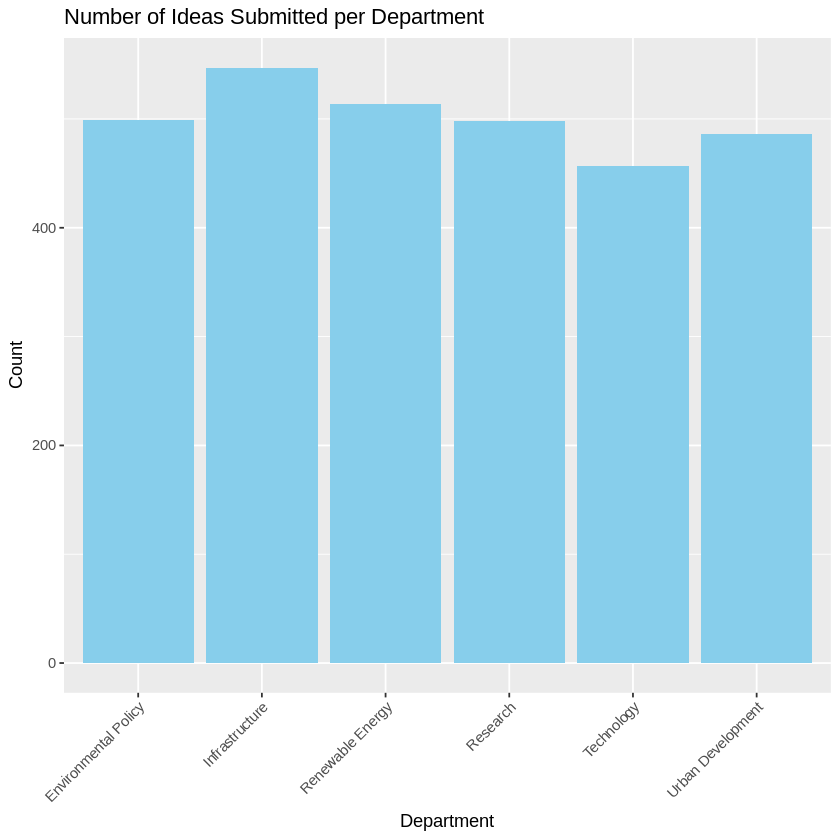

In [ ]:
#Example 1: Bar Chart – Idea Count by Department
ggplot(data, aes(x = Department)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Number of Ideas Submitted per Department", x = "Department", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#Why it’s useful: Shows which departments are most active in idea submission. Helps management identify highly engaged vs. underperforming teams.




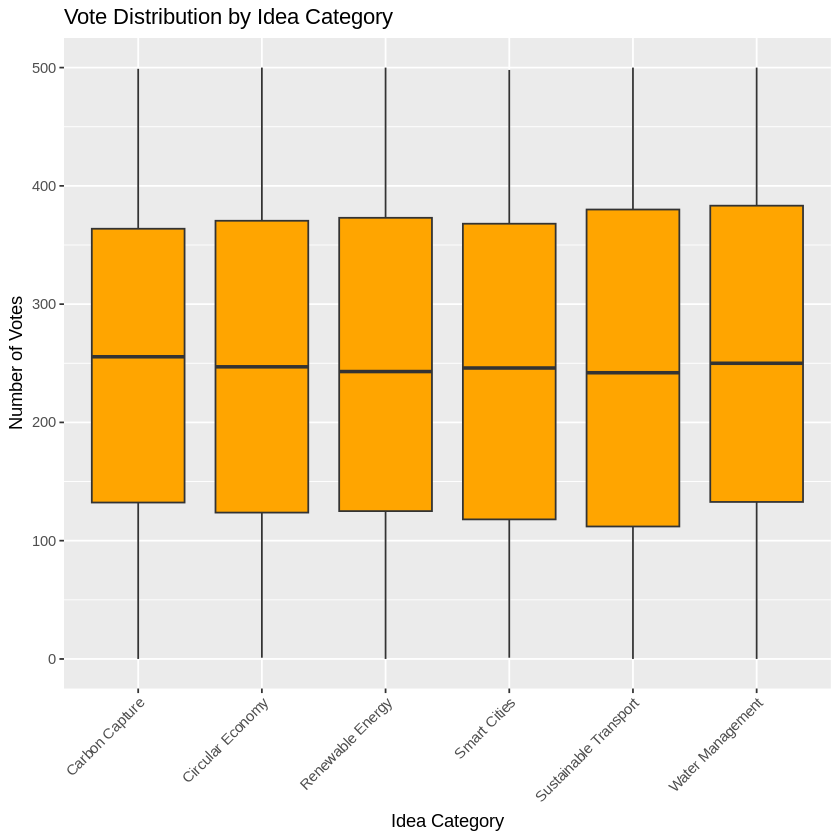

In [ ]:
#Example 2: Boxplot – Vote Distribution by Idea Category
ggplot(data, aes(x = `Idea.Category`, y = `Number.of.Votes`)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Vote Distribution by Idea Category", x = "Idea Category", y = "Number of Votes") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

#Why it’s useful: Highlights which types of ideas tend to get the most votes. Boxplots are great for spotting outliers and comparing spreads across groups.



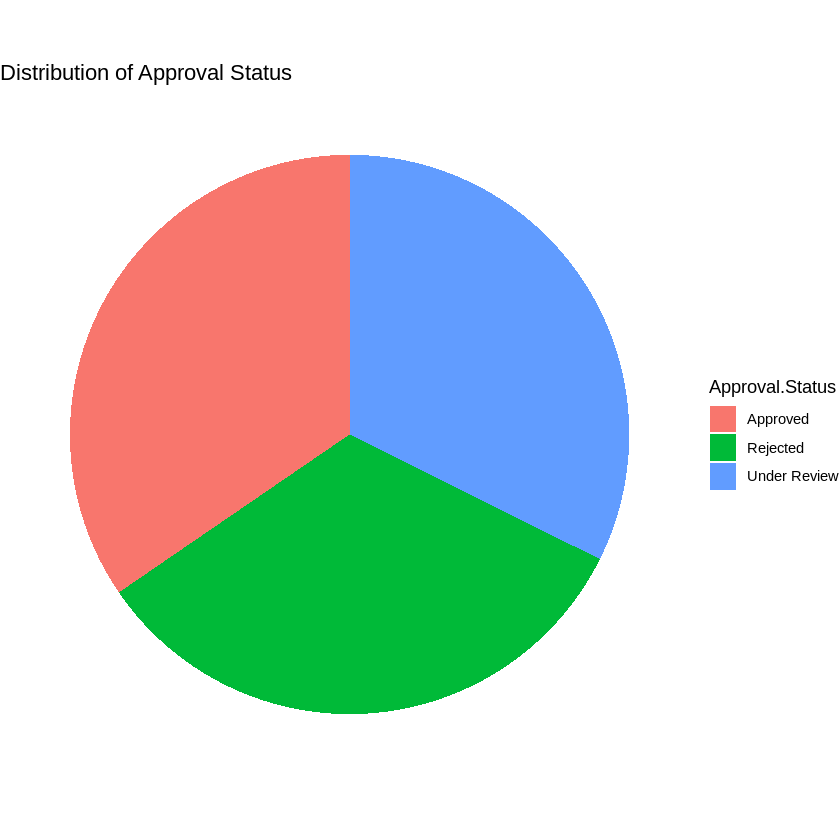

In [ ]:
#Example 3: Pie Chart – Approval Status Distribution
library(dplyr)

# Prepare data for pie chart
approval_data <- data %>%
  count(Approval.Status)

# Plot
ggplot(approval_data, aes(x = "", y = n, fill = Approval.Status)) +
  geom_col(width = 1) +
  coord_polar("y") +
  labs(title = "Distribution of Approval Status") +
  theme_void()

#Why it’s useful: Visualizes the proportion of ideas that are approved, rejected, or pending. Helps assess the effectiveness and fairness of the evaluation process.

